# **1. Collect the dataset you received in Lab 5, load it using pandas**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
income=pd.read_csv('/content/drive/MyDrive/CSE422/FALL2021/MYLABS/LAB5/Income Dataset (50k).csv')

Mounted at /content/drive


In [ ]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## **2. Apply necessary pre-processing steps on it**

In [ ]:
income.shape

(43957, 15)

In [ ]:
income.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [ ]:
# Check how many values are missing in the occupation column
print("Number of rows with null values in occupation column: ", income['occupation'].isnull().sum())

# save the income dataset

income = income[income['occupation'].notnull()]

# Print out the shape of the dataset
print("Shape after removing null values: ", income.shape)

Number of rows with null values in occupation column:  2506
Shape after removing null values:  (41451, 15)


In [ ]:
income.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     724
income_>50K          0
dtype: int64

In [ ]:
# Check how many values are missing in the native-country column
print("Number of rows with null values in native-country column: ", income['native-country'].isnull().sum())

# save the income dataset

income = income[income['native-country'].notnull()]

# Print out the shape of the dataset
print("Shape after removing null values: ", income.shape)

Number of rows with null values in native-country column:  724
Shape after removing null values:  (40727, 15)


In [ ]:
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
income['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['gender_encoded'] = enc.fit_transform(income['gender'])

# Compare the two columns
print(income[['gender', 'gender_encoded']].head(30))

    gender  gender_encoded
0     Male               1
1     Male               1
2     Male               1
3     Male               1
4     Male               1
5     Male               1
6   Female               0
7     Male               1
8     Male               1
9     Male               1
10    Male               1
11    Male               1
12  Female               0
13    Male               1
14    Male               1
15  Female               0
16    Male               1
17    Male               1
18  Female               0
19    Male               1
20    Male               1
21    Male               1
22    Male               1
23    Male               1
24    Male               1
25    Male               1
26    Male               1
27    Male               1
28    Male               1
29  Female               0


In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1


In [ ]:
income['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['workclass_encoded'] = enc.fit_transform(income['workclass'])

# Compare the two columns
print(income[['workclass', 'workclass_encoded']].head(30))

           workclass  workclass_encoded
0            Private                  2
1            Private                  2
2            Private                  2
3          State-gov                  5
4          State-gov                  5
5          State-gov                  5
6            Private                  2
7   Self-emp-not-inc                  4
8            Private                  2
9            Private                  2
10           Private                  2
11  Self-emp-not-inc                  4
12  Self-emp-not-inc                  4
13           Private                  2
14           Private                  2
15           Private                  2
16           Private                  2
17       Federal-gov                  0
18         Local-gov                  1
19           Private                  2
20           Private                  2
21           Private                  2
22  Self-emp-not-inc                  4
23           Private                  2


In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2


In [ ]:
income['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['race_encoded'] = enc.fit_transform(income['race'])

# Compare the two columns
print(income[['race', 'race_encoded']].head(30))

                  race  race_encoded
0                White             4
1                White             4
2                White             4
3                White             4
4                Black             2
5                White             4
6                White             4
7                White             4
8                White             4
9                White             4
10               White             4
11  Asian-Pac-Islander             1
12               White             4
13               White             4
14               White             4
15               White             4
16               White             4
17               White             4
18               White             4
19               White             4
20               White             4
21               White             4
22               White             4
23               White             4
24               White             4
25               White             4
2

In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded,race_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2,4
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2,4
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2,4
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5,4
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3,4
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1,4
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1,4
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2,4


In [ ]:
income['native-country'].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany',
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Trinadad&Tobago', 'Laos', 'Taiwan',
       'France', 'Hungary', 'Honduras', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['native-country_encoded'] = enc.fit_transform(income['native-country'])

# Compare the two columns
print(income[['native-country', 'native-country_encoded']].head(30))

   native-country  native-country_encoded
0   United-States                      38
1   United-States                      38
2   United-States                      38
3   United-States                      38
4   United-States                      38
5   United-States                      38
6   United-States                      38
7           Japan                      23
8   United-States                      38
9   United-States                      38
10  United-States                      38
11          South                      34
12  United-States                      38
13  United-States                      38
14  United-States                      38
15  United-States                      38
16  United-States                      38
17  United-States                      38
18  United-States                      38
19  United-States                      38
20  United-States                      38
21       Portugal                      31
22  United-States                 

In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2,4,38
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2,4,38
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2,4,38
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5,4,38
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5,2,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3,4,38
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1,4,38
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1,4,38
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2,4,38


In [ ]:
income['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['marital-status_encoded'] = enc.fit_transform(income['marital-status'])

# Compare the two columns
print(income[['marital-status','marital-status_encoded']].head(30))

        marital-status  marital-status_encoded
0             Divorced                       0
1        Never-married                       4
2   Married-civ-spouse                       2
3   Married-civ-spouse                       2
4        Never-married                       4
5        Never-married                       4
6   Married-civ-spouse                       2
7   Married-civ-spouse                       2
8        Never-married                       4
9   Married-civ-spouse                       2
10       Never-married                       4
11  Married-civ-spouse                       2
12             Widowed                       6
13       Never-married                       4
14       Never-married                       4
15             Widowed                       6
16  Married-civ-spouse                       2
17  Married-civ-spouse                       2
18       Never-married                       4
19  Married-civ-spouse                       2
20  Married-c

In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2,4,38,0
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2,4,38,4
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2,4,38,2
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5,4,38,2
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5,2,38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3,4,38,2
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1,4,38,4
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1,4,38,2
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2,4,38,2


In [ ]:
income['occupation'].unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['occupation_encoded'] = enc.fit_transform(income['occupation'])

# Compare the two columns
print(income[['occupation', 'occupation_encoded']].head(30))

           occupation  occupation_encoded
0     Exec-managerial                   3
1       Other-service                   7
2     Exec-managerial                   3
3    Transport-moving                  13
4       Other-service                   7
5        Adm-clerical                   0
6   Machine-op-inspct                   6
7               Sales                  11
8   Handlers-cleaners                   5
9     Exec-managerial                   3
10    Exec-managerial                   3
11  Machine-op-inspct                   6
12    Farming-fishing                   4
13  Handlers-cleaners                   5
14      Other-service                   7
15    Protective-serv                  10
16   Transport-moving                  13
17    Exec-managerial                   3
18     Prof-specialty                   9
19     Prof-specialty                   9
20   Transport-moving                  13
21              Sales                  11
22       Craft-repair             

In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded,occupation_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2,4,38,0,3
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2,4,38,4,7
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2,4,38,2,3
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5,4,38,2,13
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5,2,38,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3,4,38,2,11
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1,4,38,4,9
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1,4,38,2,7
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2,4,38,2,9


In [ ]:
income['relationship'].unique()

array(['Not-in-family', 'Own-child', 'Husband', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
income['relationship_encoded'] = enc.fit_transform(income['relationship'])

# Compare the two columns
print(income[['relationship', 'relationship_encoded']].head(20))

     relationship  relationship_encoded
0   Not-in-family                     1
1       Own-child                     3
2         Husband                     0
3         Husband                     0
4   Not-in-family                     1
5       Own-child                     3
6            Wife                     5
7         Husband                     0
8   Not-in-family                     1
9         Husband                     0
10      Own-child                     3
11      Own-child                     3
12  Not-in-family                     1
13      Own-child                     3
14  Not-in-family                     1
15  Not-in-family                     1
16        Husband                     0
17        Husband                     0
18      Own-child                     3
19        Husband                     0


In [ ]:
income.head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded,occupation_encoded,relationship_encoded
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,1,2,4,38,0,3,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,1,2,4,38,4,7,3
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1,2,4,38,2,3,0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,1,5,4,38,2,13,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,1,5,2,38,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49,Self-emp-inc,172246,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1,1,3,4,38,2,11,0
104,73,Local-gov,45784,Some-college,10,Never-married,Prof-specialty,Other-relative,White,Female,0,0,11,United-States,0,0,1,4,38,4,9,2
105,59,Local-gov,197290,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0,1,1,4,38,2,7,0
106,33,Private,264554,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1,1,2,4,38,2,9,0


In [ ]:
income=income.drop(['workclass','education','marital-status','occupation','relationship','race','gender','native-country'],axis=1)

In [ ]:
income.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded,occupation_encoded,relationship_encoded
0,67,366425,16,99999,0,60,1,1,2,4,38,0,3,1
1,17,244602,8,0,0,15,0,1,2,4,38,4,7,3
2,31,174201,13,0,0,40,1,1,2,4,38,2,3,0
3,58,110199,4,0,0,40,0,1,5,4,38,2,13,0
4,25,149248,10,0,0,40,0,1,5,2,38,4,7,1


In [ ]:
income.shape

(40727, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
income_scaled=pd.DataFrame(scaler.fit_transform(income),columns=income.columns)

In [ ]:
print("Per-feature minimum before scaling:\n {}".format(income.min(axis=1)))
print("Per-feature maximum before scaling:\n {}".format(income.max(axis=1)))

Per-feature minimum before scaling:
 0        0
1        0
2        0
3        0
4        0
        ..
43952    0
43953    0
43954    0
43955    0
43956    0
Length: 40727, dtype: int64
Per-feature maximum before scaling:
 0        366425
1        244602
2        174201
3        110199
4        149248
          ...  
43952     68982
43953    116562
43954    197947
43955     97883
43956    375827
Length: 40727, dtype: int64


In [ ]:
print("Per-feature minimum after scaling:\n {}".format(income_scaled.min(axis=1)))
print("Per-feature maximum after scaling:\n {}".format(income_scaled.max(axis=1)))

Per-feature minimum after scaling:
 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40722    0.0
40723    0.0
40724    0.0
40725    0.0
40726    0.0
Length: 40727, dtype: float64
Per-feature maximum after scaling:
 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
40722    1.0
40723    1.0
40724    1.0
40725    1.0
40726    1.0
Length: 40727, dtype: float64


In [ ]:
income_scaled.head(30)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded,occupation_encoded,relationship_encoded
0,0.684932,0.238967,1.000000,1.000000,0.000000,0.602041,1.0,1.0,0.333333,1.00,0.950,0.000000,0.230769,0.2
1,0.000000,0.156482,0.466667,0.000000,0.000000,0.142857,0.0,1.0,0.333333,1.00,0.950,0.666667,0.538462,0.6
2,0.191781,0.108814,0.800000,0.000000,0.000000,0.397959,1.0,1.0,0.333333,1.00,0.950,0.333333,0.230769,0.0
3,0.561644,0.065479,0.200000,0.000000,0.000000,0.397959,0.0,1.0,0.833333,1.00,0.950,0.333333,1.000000,0.0
4,0.109589,0.091919,0.600000,0.000000,0.000000,0.397959,0.0,1.0,0.833333,0.50,0.950,0.666667,0.538462,0.2
5,0.575342,0.062205,0.533333,0.000000,0.000000,0.397959,0.0,1.0,0.833333,1.00,0.950,0.666667,0.000000,0.6
6,0.726027,0.137380,0.266667,0.026530,0.000000,0.397959,0.0,0.0,0.333333,1.00,0.950,0.333333,0.461538,1.0
7,0.246575,0.235896,0.800000,0.000000,0.000000,0.602041,0.0,1.0,0.666667,1.00,0.575,0.333333,0.846154,0.0
8,0.150685,0.041500,0.533333,0.000000,0.000000,0.500000,0.0,1.0,0.333333,1.00,0.950,0.666667,0.384615,0.2
9,0.150685,0.070822,0.533333,0.043860,0.000000,0.448980,1.0,1.0,0.333333,1.00,0.950,0.333333,0.230769,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=income['income_>50K'].copy()
x=pd.DataFrame(income.drop(['income_>50K'],axis=1))
x.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_encoded,workclass_encoded,race_encoded,native-country_encoded,marital-status_encoded,occupation_encoded,relationship_encoded
0,67,366425,16,99999,0,60,1,2,4,38,0,3,1
1,17,244602,8,0,0,15,1,2,4,38,4,7,3
2,31,174201,13,0,0,40,1,2,4,38,2,3,0
3,58,110199,4,0,0,40,1,5,4,38,2,13,0
4,25,149248,10,0,0,40,1,5,2,38,4,7,1
5,59,105363,9,0,0,40,1,5,4,38,4,0,3
6,70,216390,5,2653,0,40,0,2,4,38,2,6,5
7,35,361888,13,0,0,60,1,4,4,23,2,11,0
8,28,74784,9,0,0,50,1,2,4,38,4,5,1
9,28,118089,9,4386,0,45,1,2,4,38,2,3,0


# **3. Support Vector Machine (SVM), Neural Network (Multilayer Perceptron Classifier) and Random Forest are three very popular machine learning classifiers. Divide the dataset into 8:2 train-test split and perform Support Vector Machine, Neural Network (MLPClassifier) and Random Forest on it using sklearn library.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
print ("Training set : x-> {} , y-> {}\nTesting set: x-> {}, y-> {}". format (X_train.shape, y_train.shape , X_test.shape, y_test.shape))

Training set : x-> (32581, 13) , y-> (32581,)
Testing set: x-> (8146, 13), y-> (8146,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 

In [ ]:
# # #SVM classifier
#svm = SVC(kernel="linear")
svm= SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)
SVM_1 = svm.score(X_train, y_train)
SVM_2 = svm.score(X_test, y_test)
print("Testing accuracy of the model pre PCA is {:.2f}". format (svm.score (X_test, y_test)))
print("Training accuracy of the model pre PCA is {:.2f}". format (svm.score (X_train, y_train)))

Testing accuracy of the model pre PCA is 0.78
Training accuracy of the model pre PCA is 0.78


In [ ]:
#NNC 
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=1000)
nnc.fit(X_train, y_train)
NNC_1= nnc.score(X_train, y_train)
NNC_2= nnc.score (X_train, y_train)
print("Testing accuracy of the model NNC pre PCA is {:.2f}". format (nnc.score (X_test, y_test)))
print("Training accuracy of the model NNC pre PCA is {:.2f}". format (nnc.score (X_train, y_train)))

Testing accuracy of the model NNC pre PCA is 0.79
Training accuracy of the model NNC pre PCA is 0.79


In [ ]:
#Random forest
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
RFC_1= rfc.score(X_train, y_train)
RFC_2= rfc.score (X_train, y_train)
print("Testing accuracy of the Random forest model pre PCA is {:.2f}". format (rfc.score(X_train, y_train)))
print("Training accuracy of the Random forest model pre PCA is {:.2f}". format (rfc.score (X_train, y_train)))

Testing accuracy of the Random forest model pre PCA is 1.00
Training accuracy of the Random forest model pre PCA is 1.00


# **4. Perform dimensionality reduction using PCA. Reduce the number of feature vectors into half (e.g. if your dataset has 10 columns, after applying PCA it should have 5 columns)**

In [ ]:
#Reducing dimesion
pca=PCA(n_components=7) # since my dataset has 14 columns after reducing the dimention it would have 7 columns
p_c = pca.fit_transform(income_scaled)

p_df = pd.DataFrame(data=p_c, columns=["principle component 1", "principle component 2","principle component 3", "principle component 4", "principle component 5","principle component 6","principle component 7"])
income_main_df=pd.concat([p_df, income_scaled[['income_>50K']]], axis=1)
income_main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,income_>50K
0,-0.759989,0.629727,-0.299551,-0.204261,0.259717,-0.023125,-0.002323,1.0
1,0.081742,-0.393403,0.114495,0.453539,0.196510,-0.177830,-0.032658,0.0
2,-0.721543,0.455358,-0.263956,0.095903,-0.062391,-0.065461,-0.205307,1.0
3,-0.302300,-0.428059,0.494139,-0.310922,-0.002466,-0.034697,0.502757,0.0
4,-0.110566,-0.424060,0.117768,0.257590,-0.057197,0.339660,0.002200,0.0


# **5.Apply Support Vector Machine, Neural Network (MLPClassifier) and Random Forest again on the reduced dataset.**

In [ ]:
#SVM post PCA

X= income_main_df.drop('income_>50K' , axis=1)
y= income_main_df['income_>50K']
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
SV_1= svm.score(x_train, y_train)
SV_2= svm.score (x_train, y_train)
print("Testing accuracy of the model SVM post PCA is {:.2f}". format (svm.score (x_test, y_test)))
print("Training accuracy of the model SVM post PCA is {:.2f}". format (svm.score (x_train, y_train)))

Testing accuracy of the model SVM post PCA is 1.00
Training accuracy of the model SVM post PCA is 1.00


In [ ]:
#NNC after PCA
X= income_main_df.drop('income_>50K' , axis=1)
y= income_main_df['income_>50K']
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
nn=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=5)
nn.fit(x_train, y_train)
nn_1= nn.score(x_train, y_train)
nn_2= nn.score (x_train, y_train)
print("Testing accuracy of the model Random forest post PCA is {:.2f}". format (nn.score (x_test, y_test)))
print("Training accuracy of the model Random forest post PCA is {:.2f}". format (nn.score (x_train, y_train)))


Testing accuracy of the model Random forest post PCA is 1.00
Training accuracy of the model Random forest post PCA is 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Random forest classifier after PCA
X= income_main_df.drop('income_>50K' , axis=1)
y= income_main_df['income_>50K']
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
rf = RandomForestClassifier(n_estimators=3)
rf.fit(x_train, y_train)
rf_1= rf.score(x_train, y_train)
rf_2= rf.score (x_train, y_train)
print("Testing accuracy of the model Random forest post PCA is {:.2f}". format (rf.score (x_test, y_test)))
print("Training accuracy of the model Random forest post PCA is {:.2f}". format (rf.score (x_train, y_train)))

Testing accuracy of the model Random forest post PCA is 1.00
Training accuracy of the model Random forest post PCA is 1.00


# **6. Compare the accuracy of the pre-PCA and post-PCA results. Plot them against each other in a bar graph.**

Text(0, 0.5, 'Percentage')

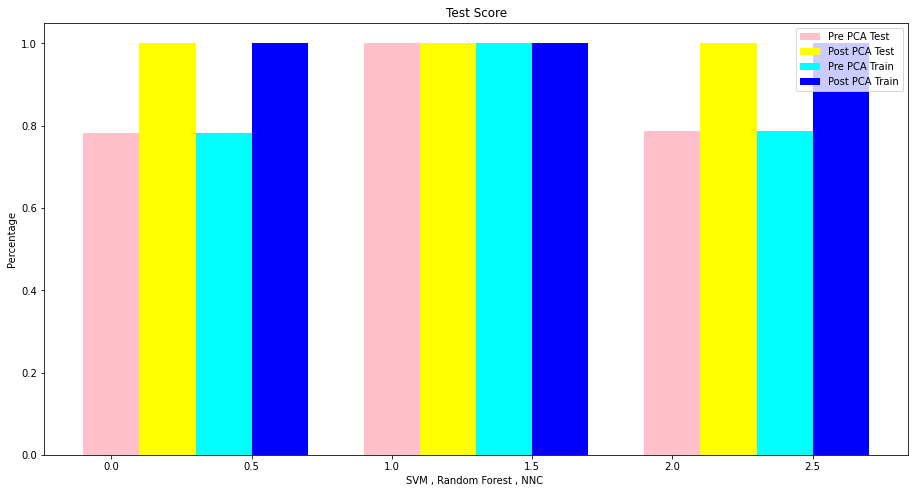

In [ ]:
input = [[SVM_1,RFC_1,NNC_1],[SV_1, rf_1, nn_1],[SVM_2,RFC_2,NNC_2],[SV_2,rf_2,nn_2]]
X = np.arange(3)

figure = plt.figure()

ax = figure.add_axes([0,0,2,1.5])

ax.bar(X + 0.00, input[0], color = 'pink', width = 0.20)
ax.bar(X + 0.20, input[1], color = 'yellow', width = 0.20)
ax.bar(X + 0.40, input[2], color = 'cyan', width = 0.20)
ax.bar(X + 0.60, input[3], color = 'blue', width = 0.20)

ax.legend(labels=['Pre PCA Test', 'Post PCA Test','Pre PCA Train','Post PCA Train'])


plt.title('Test Score')
plt.xlabel('SVM , Random Forest , NNC ')
plt.ylabel('Percentage')